In [1]:
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas import DataFrame
import collections
from datetime import datetime
import sys
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
import csv
from collections import defaultdict

In [2]:
from __future__ import division
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
%matplotlib inline

In [3]:
# Read in current incident ticket dataset as a dataframe
data = pd.read_csv("C:/Users/barnesll/Desktop/Sustainment_Dashboard/Raw_Data/PS_Dashboard_Raw_Data/RAW_INCIDENTS_8Aug.csv", engine='python')

In [4]:
# Print out incident ticket dataframe
df = pd.DataFrame(data)
df

,Incident ID,CB-ISEA,Common Name,Refined Common Name,Product Categorization Tier 1,Product Categorization Tier 2,Product Categorization Tier 3,Assigned Group,Command Name,Refined Command Name,...,Priority,IBOR,Incident Summary,Template Category Tier 1,Template Category Tier 2,Template Category Tier 3,Template Name,SOVT Document No.,CASREP DTG,CASREP Number
0,INC000003434583,APPLICATIONS,MFOM,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,MFOM-C,ACCOUNT,FLEET SUPPORT MFOM,MID ATLANTIC REGIONAL MAINTENANCE CENTER,MARMC,...,Low,95.02%,MFOM PASSWORD RESET,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INC000003434969,APPLICATIONS,MFOM,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,NMD,- None -,FLEET SUPPORT MFOM,MID ATLANTIC REGIONAL MAINTENANCE CENTER,MARMC,...,Low,95.02%,MARMC - NMD Trouble Ticket PECS24766 - MARMC C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INC000003434987,APPLICATIONS,MFOM,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,ATM,- None -,FLEET SUPPORT MFOM,USS SAN JACINTO CG 56,SAN JACINTO,...,High,63.21%,MFOM AWN ISSUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INC000003435580,APPLICATIONS,MFOM,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,NMD,- None -,FLEET SUPPORT MFOM,SOUTHWEST REGIONAL MAINTENANCE CENTER,SWRMC AIM,...,High,63.21%,SWRMC - NMD Trouble Ticket PECS24769 - CAN'T A...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,INC000003435596,APPLICATIONS,MFOM,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,NaN,NaN,FLEET SUPPORT MFOM,COMNAVSURFPAC,COMNAVSURFPAC,...,Low,95.02%,Reactivation of MFOM account,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,INC000003435796,APPLICATIONS,MFOM,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,NaN,NaN,FLEET SUPPORT MFOM,SOUTHWEST REGIONAL MAINTENANCE CENTER-AIM,SWRMC AIM,...,High,63.21%,SWRMC - NMD Trouble Ticket PECS24775 - Need Av...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,INC000003435940,APPLICATIONS,MFOM,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,NaN,NaN,FLEET SUPPORT MFOM,USS TORNADO PC 14,TORNADO,...,High,63.21%,FAS-AU UNCLASS MFOM LAPTOP INSTALL REQUEST,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,INC000003435984,APPLICATIONS,MFOM,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,NaN,NaN,FLEET SUPPORT MFOM,SOUTHWEST REGIONAL MAINTENANCE CENTER-AIM,SWRMC AIM,...,High,63.21%,SWRMC - NMD Trouble Ticket PECS24777 - Receivi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,INC000003436113,APPLICATIONS,MFOM,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,NaN,NaN,FLEET SUPPORT MFOM,SOUTHWEST REGIONAL MAINTENANCE CENTER-AIM,SWRMC AIM,...,High,63.21%,SWRMC - NMD Trouble Ticket PECS24776 - Need Pa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,INC000003436168,APPLICATIONS,MFOM,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,NaN,NaN,FLEET SUPPORT MFOM,SOUTHWEST REGIONAL MAINTENANCE CENTER-AIM,SWRMC AIM,...,Medium,86.47%,SWRMC - NMD Trouble Ticket PECS24778 - ENHANCE...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Drop columns that would not be needed for machine learning
df2 = df.drop(['Incident ID', 'Common Name', 'Product Categorization Tier 2', 'Product Categorization Tier 3', 'Command Name', 'Refined Homeport', 'Last Modified Date',
        'Submit Date', 'Impact', 'Weight', 'Incident Service Type', 'Incident Summary', 'Incident Service Type', 'Operational  Categorization Tier 1', 'Operational  Categorization Tier 2', 'Operational  Categorization Tier 3',
        'IBOR', 'Template Category Tier 1', 'Template Category Tier 2', 'Template Category Tier 3', 'Template Name', 'CASREP DTG', 'CASREP Number', 'SOVT Document No.'], axis=1)

In [6]:
# Print total amount of rows and columns (rows, columns)
df2
print(df2.shape)

(55587, 10)


In [7]:
# Drop all rows that NaN as a value in any column.
df3 = df2.dropna(axis=0, how='any')
print(df3.shape)
df3

(55585, 10)


,CB-ISEA,Refined Common Name,Product Categorization Tier 1,Assigned Group,Refined Command Name,Incident Age (Days),Status,Proactive Sustainment Action,Urgency,Priority
0,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,MARMC,1,Assigned,No,4,Low
1,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,MARMC,1,Assigned,No,4,Low
2,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,SAN JACINTO,1,Assigned,No,2,High
3,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,SWRMC AIM,1,Assigned,No,2,High
4,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,COMNAVSURFPAC,1,Assigned,No,4,Low
5,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,SWRMC AIM,1,Assigned,No,2,High
6,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,TORNADO,1,Assigned,No,2,High
7,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,SWRMC AIM,1,Assigned,No,2,High
8,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,SWRMC AIM,1,Assigned,No,2,High
9,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,SWRMC AIM,1,Assigned,No,3,Medium


In [8]:
# Frequency check on amount of tickets that are Proactive Sustainment
df3['Proactive Sustainment Action'].describe()

count     55585
unique        2
top          No
freq      51401
Name: Proactive Sustainment Action, dtype: object

In [9]:
# Created dataframe that has only Proactive Sustainment tickets
df4 = df3[df3['Proactive Sustainment Action'] == 'Yes']
print(df4.shape) 
df4

(4184, 10)


,CB-ISEA,Refined Common Name,Product Categorization Tier 1,Assigned Group,Refined Command Name,Incident Age (Days),Status,Proactive Sustainment Action,Urgency,Priority
125,CYBER SECURITY,CRYPTO PRODUCTS,COMMUNICATIONS SECURITY,COMSEC INE,NCTAMS PAC,26,Assigned,Yes,3,Medium
135,CYBER SECURITY,PKI,PUBLIC KEY INFRASTRUCTURE,NCVI,NCTS HAMPTON ROADS,7,Assigned,Yes,3,Medium
189,NAVIGATION,NAVSSI,NAVIGATION SENSOR SYSTEM INTERFACE,NAVSSI,WINSTON S CHURCHILL,132,Assigned,Yes,3,Medium
190,NAVIGATION,NAVSSI,NAVIGATION SENSOR SYSTEM INTERFACE,NAVSSI,WINSTON S CHURCHILL,132,Assigned,Yes,3,Medium
253,SATCOM,GBS,GLOBAL BROADCAST SERVICE,GBS,SPRUANCE,34,Assigned,Yes,4,Low
593,SUB RADIO ROOMS,CSRR,COMMON SUBMARINE RADIO ROOM,CSRR ISEA,TOPEKA,56,Assigned,Yes,3,Medium
611,SUB RADIO ROOMS,CSRR,COMMON SUBMARINE RADIO ROOM,CSRR ISEA,SCRANTON,48,Assigned,Yes,3,Medium
612,SUB RADIO ROOMS,CSRR,COMMON SUBMARINE RADIO ROOM,CSRR ISEA,SCRANTON,48,Assigned,Yes,3,Medium
661,SUB RADIO ROOMS,CSRR RFDACS,COMMON SUBMARINE RADIO ROOM RADIO FREQUENCY DI...,CSRR ISEA,ANNAPOLIS,50,Assigned,Yes,2,High
662,SUB RADIO ROOMS,CSRR RFDACS,COMMON SUBMARINE RADIO ROOM RADIO FREQUENCY DI...,CSRR RFDACS,MINNESOTA,15,Assigned,Yes,2,High


In [10]:
# Created dataframe that has only Reactive tickets
df5 = df3[df3['Proactive Sustainment Action'] == 'No']
print(df5.shape) 
df5

(51401, 10)


,CB-ISEA,Refined Common Name,Product Categorization Tier 1,Assigned Group,Refined Command Name,Incident Age (Days),Status,Proactive Sustainment Action,Urgency,Priority
0,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,MARMC,1,Assigned,No,4,Low
1,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,MARMC,1,Assigned,No,4,Low
2,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,SAN JACINTO,1,Assigned,No,2,High
3,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,SWRMC AIM,1,Assigned,No,2,High
4,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,COMNAVSURFPAC,1,Assigned,No,4,Low
5,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,SWRMC AIM,1,Assigned,No,2,High
6,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,TORNADO,1,Assigned,No,2,High
7,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,SWRMC AIM,1,Assigned,No,2,High
8,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,SWRMC AIM,1,Assigned,No,2,High
9,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,SWRMC AIM,1,Assigned,No,3,Medium


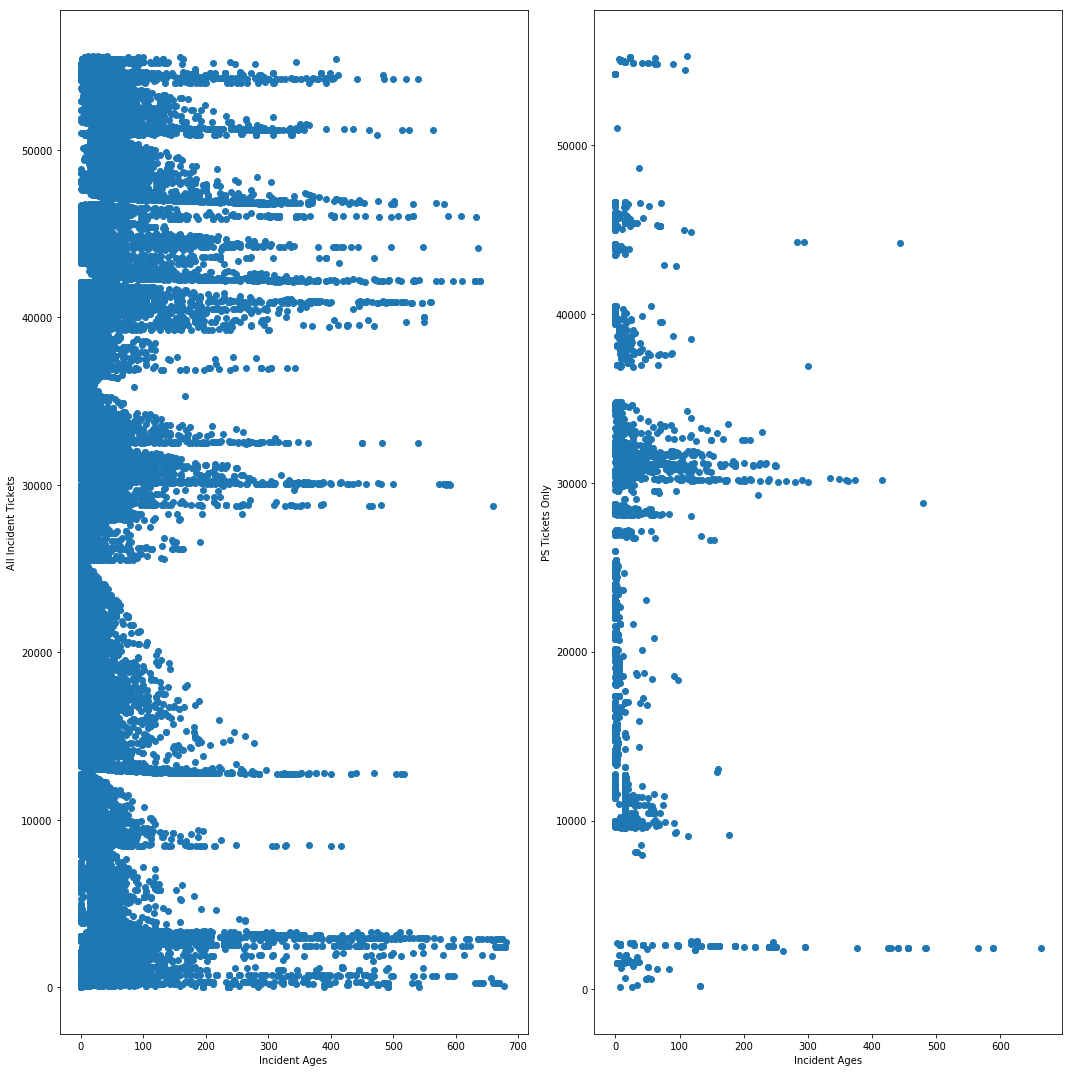

In [11]:
# Create two graphs displaying All Incident Tickets vs PS Tickets
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.scatter(df3['Incident Age (Days)'], df3.index)
plt.xlabel('Incident Ages')
plt.ylabel('All Incident Tickets')
           
plt.subplot(1,2,2)
plt.scatter(df4['Incident Age (Days)'], df4.index)
plt.xlabel('Incident Ages')
plt.ylabel('PS Tickets Only')

plt.tight_layout()
plt.show()

Wall time: 8min 1s


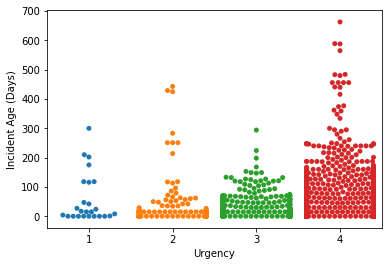

In [12]:
%%time
swarm_plot = sns.swarmplot(x=df4['Urgency'], y=df4['Incident Age (Days)'])
fig = swarm_plot.get_figure()
fig.savefig("PS_SwarmPlot_8Aug18.jpeg")

Wall time: 15min 26s


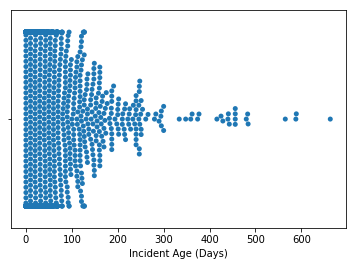

In [13]:
%%time
sns.swarmplot(df4['Incident Age (Days)'])

In [14]:
# Show only closed tickets from PS Tickets dataframe
df6 = df4[df4['Status'] == 'Closed']
print(df6.shape) 
df6

(3937, 10)


,CB-ISEA,Refined Common Name,Product Categorization Tier 1,Assigned Group,Refined Command Name,Incident Age (Days),Status,Proactive Sustainment Action,Urgency,Priority
7947,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,NEW ORLEANS,42,Closed,Yes,1,Critical
8128,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,BUNKER HILL,30,Closed,Yes,4,Low
8154,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,MAKIN ISLAND,34,Closed,Yes,4,Low
8576,APPLICATIONS,NTCSS,NAVAL TACTICAL COMMAND SUPPORT SYSTEM,FLEET SUPPORT LANT NTCSS SYSTEMS,GLADIATOR,40,Closed,Yes,3,Medium
9079,APPLICATIONS,NTCSS,NAVAL TACTICAL COMMAND SUPPORT SYSTEM,FLEET SUPPORT LANT NTCSS SYSTEMS,WINSTON S CHURCHILL,113,Closed,Yes,3,Medium
9156,APPLICATIONS,NTCSS,NAVAL TACTICAL COMMAND SUPPORT SYSTEM,FLEET SUPPORT LANT NTCSS NALCOMIS,ABRAHAM LINCOLN,177,Closed,Yes,4,Low
9282,APPLICATIONS,NTCSS,NAVAL TACTICAL COMMAND SUPPORT SYSTEM,FLEET SUPPORT LANT NTCSS SYSTEMS,DEVASTATOR,93,Closed,Yes,4,Low
9292,APPLICATIONS,NTCSS,NAVAL TACTICAL COMMAND SUPPORT SYSTEM,FLEET SUPPORT LANT NTCSS SYSTEMS,GEORGE WASHINGTON,94,Closed,Yes,3,Medium
9543,APPLICATIONS,NTCSS,OPTIMIZED ORGANIZATIONAL MAINTENANCE ACTIVITY,FLEET SUPPORT LANT OOMA REPLICATION,SSC LANT NORFOLK,15,Closed,Yes,3,Medium
9555,APPLICATIONS,NTCSS,NAVAL TACTICAL COMMAND SUPPORT SYSTEM,FLEET SUPPORT LANT NTCSS SYSTEMS,DEVASTATOR,41,Closed,Yes,4,Low


In [15]:
# Show only closed tickets from Reactive Tickets dataframe
df7 = df5[df5['Status'] == 'Closed']
print(df7.shape) 
df7

(47354, 10)


,CB-ISEA,Refined Common Name,Product Categorization Tier 1,Assigned Group,Refined Command Name,Incident Age (Days),Status,Proactive Sustainment Action,Urgency,Priority
3337,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,SSC LANT,184,Closed,No,3,Medium
3338,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,SIROCCO,207,Closed,No,3,Medium
3339,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,PORTER,199,Closed,No,3,Medium
3340,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,FIREBOLT,196,Closed,No,3,Medium
3341,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,SSC LANT NORFOLK,130,Closed,No,3,Medium
3342,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,JASON DUNHAM,100,Closed,No,4,Low
3343,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,TEMPEST,132,Closed,No,2,High
3344,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,US FLEET FORCES COMMAND,123,Closed,No,4,Low
3345,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,SSC LANT NEW ORLEANS,104,Closed,No,4,Low
3346,APPLICATIONS,MFOM,MAINTENANCE FIGURE OF MERIT SYSTEM,FLEET SUPPORT MFOM,MARMC,99,Closed,No,2,High


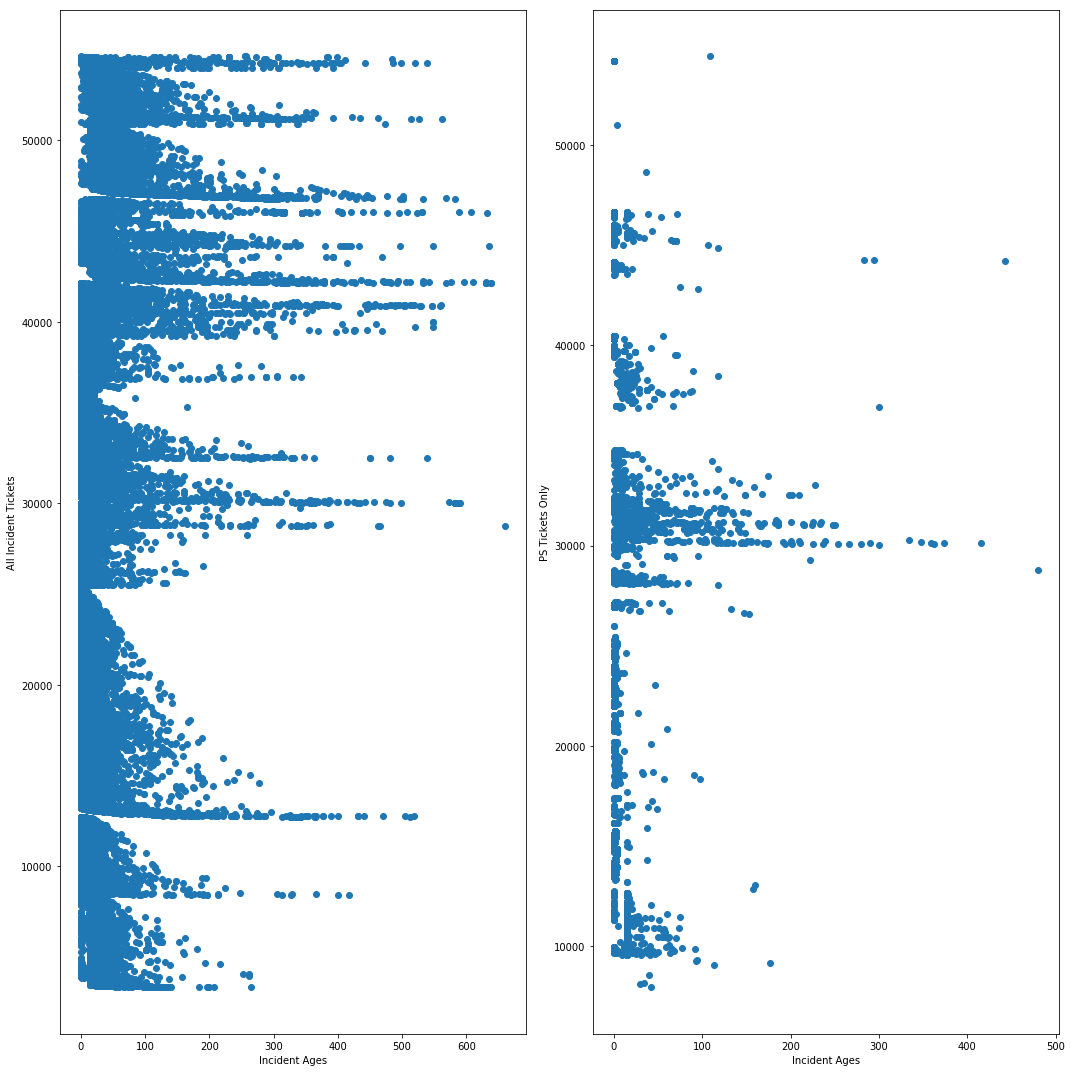

In [16]:
# Create two graphs displaying Closed Reactive Tickets vs Closed PS Tickets
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.scatter(df7['Incident Age (Days)'], df7.index)
plt.xlabel('Incident Ages')
plt.ylabel('All Incident Tickets')
           
plt.subplot(1,2,2)
plt.scatter(df6['Incident Age (Days)'], df6.index)
plt.xlabel('Incident Ages')
plt.ylabel('PS Tickets Only')

plt.tight_layout()
plt.show()

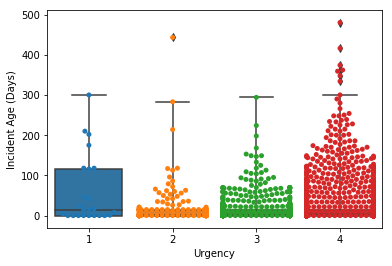

In [17]:
# Swarmplot for Closed PS Tickets
ps_plot = sns.swarmplot(x=df6['Urgency'], y=df6['Incident Age (Days)'])
ps_plot = sns.boxplot(x=df6['Urgency'], y=df6['Incident Age (Days)'], whis=20)
fig = swarm_plot.get_figure()
fig.savefig("PS_SwarmPlot_Closed_8Aug18.jpeg")

In [ ]:
# Principal Component Analysis